# Roznama Saudi Arabia Intertainment Events website
This site offers a calendar for each recreational activities around the parts of the Kingdom:
can browse or search for certain activities for family and friends.

- URL: https://roznamah.sa/en/

## Problem statment
- Understand the segments of people (audiance type) in saudi arabia (all, family, children/ male vs females) that are seaking Events to attend and interrested
- Declearing the events types that have highest demands
- Does these events suites the ammount of demands
- Does the Event prices affects its satisfaction

## Webscrape the website:
- Here Selinum, Beutiful soup and XPath is used to extract all usefull data to use for finding the solutions of the given problem.
- A Final Dataframe is generated at the end and saved as .csv file: Roznama_KSA_Events.csv
- Data set features are explained at the end.


In [256]:
# Import required libraries:

from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver

from time import sleep

In [257]:
# web scraping using Selenium:

driver = webdriver.Chrome("chromedriver/chromedriver")
driver.get('https://roznamah.sa/en/events/?pn=1')
sleep(8)
HTML1 = driver.page_source
soup = BeautifulSoup(HTML1, 'html.parser')
print(soup.find_all('div', attrs={'class':'card sticky-action'}) )
driver.close()

[<div class="card sticky-action">
<a href="/en/events/x-jed/" itemprop="url">
<div class="card-image waves-effect waves-block waves-light animated fadeIn">
<img alt="X JED" class="activator responsive-img" itemprop="image" src="https://enjoy.sa/media/3662/xjed.jpg?width=350&amp;height=250&amp;mode=crop"/>
</div>
</a>
<div class="desc">
<div class="label-list animated fadeIn">
<a href="/en/events/x-jed/">
<h4 class="hidden">X JED</h4>
</a>
<em>Category</em>
<span class="chip"><a href="/en/event-categories/festival/">Festival</a></span>
<em>Target Audience</em>
<span class="chip"><a href="/en/audience-types/all/">All</a></span>
<a href="/en/events/x-jed/">
<h4 itemprop="name">X JED</h4>
<div class="edesc" itemprop="description">
A family waterfront festival featuring live performance, a theater for entertaining shows, restaurant and beverage corners, a shopping mall and a children's play area.
</div>
<ul class="clearfix t--ww">
<li class="col s5 m4 l4" itemprop="location" itemscope="" it

In [258]:
response.status_code

200

In [259]:
HTML1 =response.text
soup = BeautifulSoup(HTML1, 'lxml') # build tree-- clearfix-- 

In [390]:
item_list = soup.find_all('div', attrs={'class':'card sticky-action'}) # find() for one element, find_all() returns all elements
len(item_list)

4

In [ ]:
# Webscraping Roznama website BY Selenum, to extract the data :

name, date, location, chips = [], [], [], []
page = 1
links_ = []
driver = webdriver.Chrome("chromedriver/chromedriver")

# looping over the 3 pages in thier website:
while page <4:
    driver.get("https://roznamah.sa/en/events/?pn={}".format(page))
    sleep(8)
    HTML1 = driver.page_source
    soup = BeautifulSoup(HTML1, 'html.parser')
    
    item_list = soup.find_all('div', attrs={'class':'card sticky-action'}) # find() for one element, find_all() returns all elements
    
    #looping over all Event cards in a page:
    # extracting data for: Event name, Event date, Event location(City), Event Audiance and Type (as one column from chip attribute class), and webpage link for each specific Event
    for card in item_list:
        name.append(card.find('h4', attrs={'itemprop':'name'}).text.strip())
        date.append(card.find_all('li')[1].text.strip())
        location.append(card.find('span', attrs={'itemprop':'name'}).text.strip())
        chips.append([x.find("a").text.strip() for x in card.find_all('span', attrs={'class':'chip'})])
        l = card.find('a')

        links_.append("https://roznamah.sa"+l.attrs['href'])
       # links.append(soup.find('a', attrs={'data-sort':'1065'}).attrs['href'])

    page = page+1
driver.close()



In [281]:
links_

['https://roznamah.sa/en/events/x-jed/',
 'https://roznamah.sa/en/events/bounce/',
 'https://roznamah.sa/en/events/la-rustica-vibes/',
 'https://roznamah.sa/en/events/ylaah-salt/',
 'https://roznamah.sa/en/events/half-a-million-box-park/',
 'https://roznamah.sa/en/events/the-marvel-experience-ksa/',
 'https://roznamah.sa/en/events/the-303-project/',
 'https://roznamah.sa/en/events/bounce-is-now-open/',
 'https://roznamah.sa/en/events/mama-africa/',
 'https://roznamah.sa/en/events/al-buraq/',
 'https://roznamah.sa/en/events/madina-comedy-club-2/',
 'https://roznamah.sa/en/events/madina-comedy-club-4/',
 'https://roznamah.sa/en/events/madina-comedy-club-3/',
 'https://roznamah.sa/en/events/madina-comedy-club-5/',
 'https://roznamah.sa/en/events/madina-comedy-club-6/',
 'https://roznamah.sa/en/events/sawadna/',
 'https://roznamah.sa/en/events/the-shadow-show/',
 'https://roznamah.sa/en/events/kids-zone-festival/',
 'https://roznamah.sa/en/events/helwa-ya-belady/',
 'https://roznamah.sa/en

In [388]:
l = soup.find_all('a', attrs={'itemprop':'url'})

[]

In [282]:
# creating a Dataframe populated with all the Events URL's
df_links= pd.DataFrame({'links': links_})
df_links.head(30)

,links
0,https://roznamah.sa/en/events/x-jed/
1,https://roznamah.sa/en/events/bounce/
2,https://roznamah.sa/en/events/la-rustica-vibes/
3,https://roznamah.sa/en/events/ylaah-salt/
4,https://roznamah.sa/en/events/half-a-million-b...
5,https://roznamah.sa/en/events/the-marvel-exper...
6,https://roznamah.sa/en/events/the-303-project/
7,https://roznamah.sa/en/events/bounce-is-now-open/
8,https://roznamah.sa/en/events/mama-africa/
9,https://roznamah.sa/en/events/al-buraq/


In [283]:
# populating and creating a Dataframe:

df= pd.DataFrame({'Event_Name': name,
                 'Event_Date': date,
                 'Location': location,
                 'EventType_Audiance': chips})

In [284]:
#cheking out Dataframe's columns datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
Event_Name            21 non-null object
Event_Date            21 non-null object
Location              21 non-null object
EventType_Audiance    21 non-null object
dtypes: object(4)
memory usage: 752.0+ bytes


In [285]:
df.head(30)

,Event_Name,Event_Date,Location,EventType_Audiance
0,X JED,20 December - 04 May,Jeddah,"[Festival, All]"
1,Bounce,01 January - 31 December,Riyadh,"[Venue, Children / Female]"
2,La Rustica Vibes,01 January - 22 April,Riyadh,"[Festival, All]"
3,Ylaah Salt,23 January - 26 April,Riyadh,"[Festival, All]"
4,Half Million Box Park,25 January - 30 April,Riyadh,"[Venue, All]"
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,"[Shows & Performance, All]"
6,THE 303 PROJECT,07 March - 07 May,Riyadh,"[Festival, All]"
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,"[Sports, All]"
8,Mama Africa,05 - 20 April,Jeddah,"[Arts & Culture, All]"
9,AL BURAQ,11 - 20 April,Najran,"[Festival, All]"


In [286]:
# merging the df dataframe, and the datframe including the URL's into a new Dataframe (new_df):

new_df = pd.concat([df, df_links], axis=1)
new_df.dropna(axis=0, how='any', inplace=True)

In [287]:
new_df.isnull().sum()

Event_Name            0
Event_Date            0
Location              0
EventType_Audiance    0
links                 0
dtype: int64

In [288]:
new_df.head(30)

,Event_Name,Event_Date,Location,EventType_Audiance,links
0,X JED,20 December - 04 May,Jeddah,"[Festival, All]",https://roznamah.sa/en/events/x-jed/
1,Bounce,01 January - 31 December,Riyadh,"[Venue, Children / Female]",https://roznamah.sa/en/events/bounce/
2,La Rustica Vibes,01 January - 22 April,Riyadh,"[Festival, All]",https://roznamah.sa/en/events/la-rustica-vibes/
3,Ylaah Salt,23 January - 26 April,Riyadh,"[Festival, All]",https://roznamah.sa/en/events/ylaah-salt/
4,Half Million Box Park,25 January - 30 April,Riyadh,"[Venue, All]",https://roznamah.sa/en/events/half-a-million-b...
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,"[Shows & Performance, All]",https://roznamah.sa/en/events/the-marvel-exper...
6,THE 303 PROJECT,07 March - 07 May,Riyadh,"[Festival, All]",https://roznamah.sa/en/events/the-303-project/
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,"[Sports, All]",https://roznamah.sa/en/events/bounce-is-now-open/
8,Mama Africa,05 - 20 April,Jeddah,"[Arts & Culture, All]",https://roznamah.sa/en/events/mama-africa/
9,AL BURAQ,11 - 20 April,Najran,"[Festival, All]",https://roznamah.sa/en/events/al-buraq/


## create more datafraes for each card (30 card) then concate by for loop:


In [289]:
response0 = requests.get('https://roznamah.sa/en/events/x-jed/')

In [292]:
response0.status_code

200

In [293]:
HTML0 =response0.text

In [294]:
soup = BeautifulSoup(HTML0, 'lxml') # build tree-- clearfix-- 

In [387]:
item_list0 = soup.find_all('div', attrs={'class':'class="row no-margin-bottom clearfix"'}) # find() for one element, find_all() returns all elements
len(item_list)

0

In [296]:
### webscrape xpath:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

In [ ]:
# trying code to collect the 30 pages in a list:

In [298]:
time= Selector(text=HTML0).xpath('//*[@id="event-date"]/div/div/table/tbody/tr/td[2]/span/text()').extract()[0]

In [299]:
location=Selector(text=HTML0).xpath('//*[@id="event-date"]/div/div/div/a/span/text()').extract()[0]

In [300]:
location_gps=Selector(text=HTML0).xpath('//*[@id="event-date"]/div/div/div/a/@href').extract()[0]

In [301]:
lin = pd.Series(links_)

In [302]:
#grabbing all the Events pages URL's:
linkss= links_
linkss

['https://roznamah.sa/en/events/x-jed/',
 'https://roznamah.sa/en/events/bounce/',
 'https://roznamah.sa/en/events/la-rustica-vibes/',
 'https://roznamah.sa/en/events/ylaah-salt/',
 'https://roznamah.sa/en/events/half-a-million-box-park/',
 'https://roznamah.sa/en/events/the-marvel-experience-ksa/',
 'https://roznamah.sa/en/events/the-303-project/',
 'https://roznamah.sa/en/events/bounce-is-now-open/',
 'https://roznamah.sa/en/events/mama-africa/',
 'https://roznamah.sa/en/events/al-buraq/',
 'https://roznamah.sa/en/events/madina-comedy-club-2/',
 'https://roznamah.sa/en/events/madina-comedy-club-4/',
 'https://roznamah.sa/en/events/madina-comedy-club-3/',
 'https://roznamah.sa/en/events/madina-comedy-club-5/',
 'https://roznamah.sa/en/events/madina-comedy-club-6/',
 'https://roznamah.sa/en/events/sawadna/',
 'https://roznamah.sa/en/events/the-shadow-show/',
 'https://roznamah.sa/en/events/kids-zone-festival/',
 'https://roznamah.sa/en/events/helwa-ya-belady/',
 'https://roznamah.sa/en

In [303]:
r = requests.get("https://roznamah.sa/en/events/x-jed/")
html = r.text
Selector(text=html).xpath('//*[@id="main"]/div/article/section[2]/div').extract()

['<div class="row clearfix cont--section break-word">\n<h3 class="h1">General information</h3>\n<p>Ticket price: 35 SAR</p>\n</div>']

In [304]:
# Scraping each Event pages individually to extract the : Event_name, Ticket price, Event time,
#Event location(inside a city), Event Geo location link on map.


price_=[]
time_=[]
location_=[]
location_gps_=[]
Event_name= []

# Loop through all webpages URL's (defined previously as linkss):
for i in linkss:
    
    r = requests.get(i)
    html = r.text
    ss = Selector(text=html)
    
    #print to check its working:
    print(ss.xpath('//*[@id="main"]/div/article/div/div/div/div[1]/h1/text()').extract())
    
    #continue appending data to the lists
    Event_name.append(ss.xpath('//*[@id="main"]/div/article/div/div/div/div[1]/h1/text()').extract())
    
    # use try except to handle cases where some includes severl <p> tags that doesnt include the price, price 
    #usually in the first <p> tag.
    
    try:
        price_.append(ss.xpath('//*[@id="main"]/div/article/section[2]/div/p[1]/text()').extract()[0])
    except:
        price_.append("NA")
        
    # continue appending data to the lists
    
    time_.append(ss.xpath('//*[@id="event-date"]/div/div/table/tbody/tr/td[2]/span/text()').extract()[0])
    location_.append(ss.xpath('//*[@id="event-date"]/div/div/div/a/span/text()').extract()[0])
    location_gps_.append(ss.xpath('//*[@id="event-date"]/div/div/div/a/@href').extract()[0])
    

['X JED']
['Bounce']
['La Rustica Vibes']
['Ylaah Salt']
['Half Million Box Park']
['The Marvel Experience KSA']
['THE 303 PROJECT']
['BOUNCE is NOW OPEN!']
['Mama Africa']
['AL BURAQ']
['Madina Comedy Club - improvisation Challenge ']
['Madina comedy club - Kids Night']
['Madina Comedy Club']
['Madina comedy club - Workers night']
['Madina comedy club -Hejazi night']
['SAWADNA']
['The Shadow Show']
['Kids Zone Festival']
['helwa ya belady ']
['Festival of roses and perfumes in the area of the courtyard']
['Zanabig Floral design Contest']


In [306]:
# creating a new dataframe:

df_append = pd.DataFrame({'Event_name': Event_name,'Price':price_ ,
                         'Event_Time': time_,
                         'Event_Location':location_ ,
                         'Event_GPS_Location': location_gps_})

In [307]:
df_append

,Event_name,Price,Event_Time,Event_Location,Event_GPS_Location
0,[X JED],Ticket price: 35 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
1,[Bounce],Minimum age entry is of 3 years old,10:00 am - 10:00 pm,Bounce,"http://maps.google.com/maps?q=24.726424,46.779..."
2,[La Rustica Vibes],Free entry,05:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
3,[Ylaah Salt],Free entry,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
4,[Half Million Box Park],NA,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
5,[The Marvel Experience KSA],Ticket price: 95 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
6,[THE 303 PROJECT],every weekend,07:00 pm - 12:00 am,King Abdullah Financial District‏,"http://maps.google.com/maps?q=24.761941,46.640..."
7,[BOUNCE is NOW OPEN!],Minimum age for kids 3 Years old.,10:00 am - 10:00 pm,BOUNCE Jeddah,"http://maps.google.com/maps?q=21.618134,39.152..."
8,[Mama Africa],ticket price for kids starts from 35 riyals,05:00 pm - 12:00 am,near to Souk Al shatea,"http://maps.google.com/maps?q=21.588269,39.127..."
9,[AL BURAQ],Tickets Price :,04:00 pm - 12:00 am,park aba alrashash,"http://maps.google.com/maps?q=17.621956,44.223..."


In [308]:
#changing the column Event_name from List datatype to a string by 
#catching its values as the fitst index in a new column:
df_append['Event_name'] = df_append['Event_name'].apply(lambda x: x[0])
df_append['Event_name']

0                                                 X JED
1                                                Bounce
2                                      La Rustica Vibes
3                                            Ylaah Salt
4                                 Half Million Box Park
5                             The Marvel Experience KSA
6                                       THE 303 PROJECT
7                                   BOUNCE is NOW OPEN!
8                                           Mama Africa
9                                              AL BURAQ
10        Madina Comedy Club - improvisation Challenge 
11                      Madina comedy club - Kids Night
12                                   Madina Comedy Club
13                   Madina comedy club - Workers night
14                     Madina comedy club -Hejazi night
15                                              SAWADNA
16                                      The Shadow Show
17                                   Kids Zone F

In [309]:
new_df

,Event_Name,Event_Date,Location,EventType_Audiance,links
0,X JED,20 December - 04 May,Jeddah,"[Festival, All]",https://roznamah.sa/en/events/x-jed/
1,Bounce,01 January - 31 December,Riyadh,"[Venue, Children / Female]",https://roznamah.sa/en/events/bounce/
2,La Rustica Vibes,01 January - 22 April,Riyadh,"[Festival, All]",https://roznamah.sa/en/events/la-rustica-vibes/
3,Ylaah Salt,23 January - 26 April,Riyadh,"[Festival, All]",https://roznamah.sa/en/events/ylaah-salt/
4,Half Million Box Park,25 January - 30 April,Riyadh,"[Venue, All]",https://roznamah.sa/en/events/half-a-million-b...
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,"[Shows & Performance, All]",https://roznamah.sa/en/events/the-marvel-exper...
6,THE 303 PROJECT,07 March - 07 May,Riyadh,"[Festival, All]",https://roznamah.sa/en/events/the-303-project/
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,"[Sports, All]",https://roznamah.sa/en/events/bounce-is-now-open/
8,Mama Africa,05 - 20 April,Jeddah,"[Arts & Culture, All]",https://roznamah.sa/en/events/mama-africa/
9,AL BURAQ,11 - 20 April,Najran,"[Festival, All]",https://roznamah.sa/en/events/al-buraq/


In [310]:
# spliting conternt of one column into two, by first:
#changing a list type column (EventType_Audiance) to a string type,
#and by dropping the brakets and catching the value in two different new column name:
new_df['Event_type'] = new_df['EventType_Audiance'].apply(lambda x: x[0])
new_df['Event_Audiance']=new_df['EventType_Audiance'].apply(lambda x: x[1])

In [311]:
#drop the old column, not required any more:
new_df.drop(['EventType_Audiance'], axis=1, inplace=True)

In [312]:
new_df

,Event_Name,Event_Date,Location,links,Event_type,Event_Audiance
0,X JED,20 December - 04 May,Jeddah,https://roznamah.sa/en/events/x-jed/,Festival,All
1,Bounce,01 January - 31 December,Riyadh,https://roznamah.sa/en/events/bounce/,Venue,Children / Female
2,La Rustica Vibes,01 January - 22 April,Riyadh,https://roznamah.sa/en/events/la-rustica-vibes/,Festival,All
3,Ylaah Salt,23 January - 26 April,Riyadh,https://roznamah.sa/en/events/ylaah-salt/,Festival,All
4,Half Million Box Park,25 January - 30 April,Riyadh,https://roznamah.sa/en/events/half-a-million-b...,Venue,All
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,https://roznamah.sa/en/events/the-marvel-exper...,Shows & Performance,All
6,THE 303 PROJECT,07 March - 07 May,Riyadh,https://roznamah.sa/en/events/the-303-project/,Festival,All
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,https://roznamah.sa/en/events/bounce-is-now-open/,Sports,All
8,Mama Africa,05 - 20 April,Jeddah,https://roznamah.sa/en/events/mama-africa/,Arts & Culture,All
9,AL BURAQ,11 - 20 April,Najran,https://roznamah.sa/en/events/al-buraq/,Festival,All


In [313]:
df_append

,Event_name,Price,Event_Time,Event_Location,Event_GPS_Location
0,X JED,Ticket price: 35 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
1,Bounce,Minimum age entry is of 3 years old,10:00 am - 10:00 pm,Bounce,"http://maps.google.com/maps?q=24.726424,46.779..."
2,La Rustica Vibes,Free entry,05:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
3,Ylaah Salt,Free entry,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
4,Half Million Box Park,NA,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
5,The Marvel Experience KSA,Ticket price: 95 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
6,THE 303 PROJECT,every weekend,07:00 pm - 12:00 am,King Abdullah Financial District‏,"http://maps.google.com/maps?q=24.761941,46.640..."
7,BOUNCE is NOW OPEN!,Minimum age for kids 3 Years old.,10:00 am - 10:00 pm,BOUNCE Jeddah,"http://maps.google.com/maps?q=21.618134,39.152..."
8,Mama Africa,ticket price for kids starts from 35 riyals,05:00 pm - 12:00 am,near to Souk Al shatea,"http://maps.google.com/maps?q=21.588269,39.127..."
9,AL BURAQ,Tickets Price :,04:00 pm - 12:00 am,park aba alrashash,"http://maps.google.com/maps?q=17.621956,44.223..."


In [314]:
new_df

,Event_Name,Event_Date,Location,links,Event_type,Event_Audiance
0,X JED,20 December - 04 May,Jeddah,https://roznamah.sa/en/events/x-jed/,Festival,All
1,Bounce,01 January - 31 December,Riyadh,https://roznamah.sa/en/events/bounce/,Venue,Children / Female
2,La Rustica Vibes,01 January - 22 April,Riyadh,https://roznamah.sa/en/events/la-rustica-vibes/,Festival,All
3,Ylaah Salt,23 January - 26 April,Riyadh,https://roznamah.sa/en/events/ylaah-salt/,Festival,All
4,Half Million Box Park,25 January - 30 April,Riyadh,https://roznamah.sa/en/events/half-a-million-b...,Venue,All
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,https://roznamah.sa/en/events/the-marvel-exper...,Shows & Performance,All
6,THE 303 PROJECT,07 March - 07 May,Riyadh,https://roznamah.sa/en/events/the-303-project/,Festival,All
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,https://roznamah.sa/en/events/bounce-is-now-open/,Sports,All
8,Mama Africa,05 - 20 April,Jeddah,https://roznamah.sa/en/events/mama-africa/,Arts & Culture,All
9,AL BURAQ,11 - 20 April,Najran,https://roznamah.sa/en/events/al-buraq/,Festival,All


In [315]:
# concating two data frames :
Roznama_DF = pd.concat([new_df, df_append], axis=1)

In [316]:
Roznama_DF

,Event_Name,Event_Date,Location,links,Event_type,Event_Audiance,Event_name,Price,Event_Time,Event_Location,Event_GPS_Location
0,X JED,20 December - 04 May,Jeddah,https://roznamah.sa/en/events/x-jed/,Festival,All,X JED,Ticket price: 35 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
1,Bounce,01 January - 31 December,Riyadh,https://roznamah.sa/en/events/bounce/,Venue,Children / Female,Bounce,Minimum age entry is of 3 years old,10:00 am - 10:00 pm,Bounce,"http://maps.google.com/maps?q=24.726424,46.779..."
2,La Rustica Vibes,01 January - 22 April,Riyadh,https://roznamah.sa/en/events/la-rustica-vibes/,Festival,All,La Rustica Vibes,Free entry,05:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
3,Ylaah Salt,23 January - 26 April,Riyadh,https://roznamah.sa/en/events/ylaah-salt/,Festival,All,Ylaah Salt,Free entry,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
4,Half Million Box Park,25 January - 30 April,Riyadh,https://roznamah.sa/en/events/half-a-million-b...,Venue,All,Half Million Box Park,NA,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,https://roznamah.sa/en/events/the-marvel-exper...,Shows & Performance,All,The Marvel Experience KSA,Ticket price: 95 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
6,THE 303 PROJECT,07 March - 07 May,Riyadh,https://roznamah.sa/en/events/the-303-project/,Festival,All,THE 303 PROJECT,every weekend,07:00 pm - 12:00 am,King Abdullah Financial District‏,"http://maps.google.com/maps?q=24.761941,46.640..."
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,https://roznamah.sa/en/events/bounce-is-now-open/,Sports,All,BOUNCE is NOW OPEN!,Minimum age for kids 3 Years old.,10:00 am - 10:00 pm,BOUNCE Jeddah,"http://maps.google.com/maps?q=21.618134,39.152..."
8,Mama Africa,05 - 20 April,Jeddah,https://roznamah.sa/en/events/mama-africa/,Arts & Culture,All,Mama Africa,ticket price for kids starts from 35 riyals,05:00 pm - 12:00 am,near to Souk Al shatea,"http://maps.google.com/maps?q=21.588269,39.127..."
9,AL BURAQ,11 - 20 April,Najran,https://roznamah.sa/en/events/al-buraq/,Festival,All,AL BURAQ,Tickets Price :,04:00 pm - 12:00 am,park aba alrashash,"http://maps.google.com/maps?q=17.621956,44.223..."


In [317]:
# Dropping a duplicate column:
Roznama_DF.drop(['Event_name'], axis=1,inplace=True)

In [318]:
Roznama_DF

,Event_Name,Event_Date,Location,links,Event_type,Event_Audiance,Price,Event_Time,Event_Location,Event_GPS_Location
0,X JED,20 December - 04 May,Jeddah,https://roznamah.sa/en/events/x-jed/,Festival,All,Ticket price: 35 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
1,Bounce,01 January - 31 December,Riyadh,https://roznamah.sa/en/events/bounce/,Venue,Children / Female,Minimum age entry is of 3 years old,10:00 am - 10:00 pm,Bounce,"http://maps.google.com/maps?q=24.726424,46.779..."
2,La Rustica Vibes,01 January - 22 April,Riyadh,https://roznamah.sa/en/events/la-rustica-vibes/,Festival,All,Free entry,05:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
3,Ylaah Salt,23 January - 26 April,Riyadh,https://roznamah.sa/en/events/ylaah-salt/,Festival,All,Free entry,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
4,Half Million Box Park,25 January - 30 April,Riyadh,https://roznamah.sa/en/events/half-a-million-b...,Venue,All,NA,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,https://roznamah.sa/en/events/the-marvel-exper...,Shows & Performance,All,Ticket price: 95 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
6,THE 303 PROJECT,07 March - 07 May,Riyadh,https://roznamah.sa/en/events/the-303-project/,Festival,All,every weekend,07:00 pm - 12:00 am,King Abdullah Financial District‏,"http://maps.google.com/maps?q=24.761941,46.640..."
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,https://roznamah.sa/en/events/bounce-is-now-open/,Sports,All,Minimum age for kids 3 Years old.,10:00 am - 10:00 pm,BOUNCE Jeddah,"http://maps.google.com/maps?q=21.618134,39.152..."
8,Mama Africa,05 - 20 April,Jeddah,https://roznamah.sa/en/events/mama-africa/,Arts & Culture,All,ticket price for kids starts from 35 riyals,05:00 pm - 12:00 am,near to Souk Al shatea,"http://maps.google.com/maps?q=21.588269,39.127..."
9,AL BURAQ,11 - 20 April,Najran,https://roznamah.sa/en/events/al-buraq/,Festival,All,Tickets Price :,04:00 pm - 12:00 am,park aba alrashash,"http://maps.google.com/maps?q=17.621956,44.223..."


In [319]:
# import required libraris for plotting:
import seaborn as sns
import matplotlib as plt

In [322]:
Roznama_ksa = pd.read_csv('./Roznama_Saudi_Events.csv')

In [323]:
Roznama_ksa

,Unnamed: 0,Event_Name,Event_Date,Location,links,Event_type,Event_Audiance,Price,Event_Time,Event_Location,Event_GPS_Location
0,0,X JED,20 December - 04 May,Jeddah,https://roznamah.sa/en/events/x-jed/,Festival,All,Ticket price: 35 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
1,1,Bounce,01 January - 31 December,Riyadh,https://roznamah.sa/en/events/bounce/,Venue,Children / Female,Minimum age entry is of 3 years old,10:00 am - 10:00 pm,Bounce,"http://maps.google.com/maps?q=24.726424,46.779..."
2,2,La Rustica Vibes,01 January - 22 April,Riyadh,https://roznamah.sa/en/events/la-rustica-vibes/,Festival,All,Free entry,05:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
3,3,Ylaah Salt,23 January - 26 April,Riyadh,https://roznamah.sa/en/events/ylaah-salt/,Festival,All,Free entry,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
4,4,Half Million Box Park,25 January - 30 April,Riyadh,https://roznamah.sa/en/events/half-a-million-b...,Venue,All,NaN,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630..."
5,5,The Marvel Experience KSA,31 January - 04 May,Jeddah,https://roznamah.sa/en/events/the-marvel-exper...,Shows & Performance,All,Ticket price: 95 SAR,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105..."
6,6,THE 303 PROJECT,07 March - 07 May,Riyadh,https://roznamah.sa/en/events/the-303-project/,Festival,All,every weekend,07:00 pm - 12:00 am,King Abdullah Financial District‏,"http://maps.google.com/maps?q=24.761941,46.640..."
7,7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,https://roznamah.sa/en/events/bounce-is-now-open/,Sports,All,Minimum age for kids 3 Years old.,10:00 am - 10:00 pm,BOUNCE Jeddah,"http://maps.google.com/maps?q=21.618134,39.152..."
8,8,Mama Africa,05 - 20 April,Jeddah,https://roznamah.sa/en/events/mama-africa/,Arts & Culture,All,ticket price for kids starts from 35 riyals,05:00 pm - 12:00 am,near to Souk Al shatea,"http://maps.google.com/maps?q=21.588269,39.127..."
9,9,AL BURAQ,11 - 20 April,Najran,https://roznamah.sa/en/events/al-buraq/,Festival,All,Tickets Price :,04:00 pm - 12:00 am,park aba alrashash,"http://maps.google.com/maps?q=17.621956,44.223..."


In [325]:
#Roznama_ksa.drop(['Unnamed: 0'], axis=1,inplace=True)


In [361]:
Roznama_DF.drop(['Price'], axis=1,inplace=True)

In [1]:
Roznama_DF

NameError: name 'Roznama_DF' is not defined

In [342]:
# to change the Column Price from object datatype to an integer:
def integering(x):
    try :
        p = int(re.search("\d+",x).group())
        if p > 9 :
            return p
        else : 
            return 0
    except:
        return 0

In [343]:
Roznama_DF["price"] = Roznama_DF.Price.apply(integering)

In [394]:
Roznama_DF

,Event_Name,Event_Date,Location,links,Event_type,Event_Audiance,Event_Time,Event_Location,Event_GPS_Location,price
0,X JED,20 December - 04 May,Jeddah,https://roznamah.sa/en/events/x-jed/,Festival,All,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105...",35
1,Bounce,01 January - 31 December,Riyadh,https://roznamah.sa/en/events/bounce/,Venue,Children / Female,10:00 am - 10:00 pm,Bounce,"http://maps.google.com/maps?q=24.726424,46.779...",0
2,La Rustica Vibes,01 January - 22 April,Riyadh,https://roznamah.sa/en/events/la-rustica-vibes/,Festival,All,05:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630...",0
3,Ylaah Salt,23 January - 26 April,Riyadh,https://roznamah.sa/en/events/ylaah-salt/,Festival,All,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630...",0
4,Half Million Box Park,25 January - 30 April,Riyadh,https://roznamah.sa/en/events/half-a-million-b...,Venue,All,04:00 pm - 12:00 am,Riyadh Park,"http://maps.google.com/maps?q=24.756203,46.630...",0
5,The Marvel Experience KSA,31 January - 04 May,Jeddah,https://roznamah.sa/en/events/the-marvel-exper...,Shows & Performance,All,04:00 pm - 11:00 pm,Jeddah Waterfront,"http://maps.google.com/maps?q=21.617455,39.105...",95
6,THE 303 PROJECT,07 March - 07 May,Riyadh,https://roznamah.sa/en/events/the-303-project/,Festival,All,07:00 pm - 12:00 am,King Abdullah Financial District‏,"http://maps.google.com/maps?q=24.761941,46.640...",0
7,BOUNCE is NOW OPEN!,31 March - 31 December,Jeddah,https://roznamah.sa/en/events/bounce-is-now-open/,Sports,All,10:00 am - 10:00 pm,BOUNCE Jeddah,"http://maps.google.com/maps?q=21.618134,39.152...",0
8,Mama Africa,05 - 20 April,Jeddah,https://roznamah.sa/en/events/mama-africa/,Arts & Culture,All,05:00 pm - 12:00 am,near to Souk Al shatea,"http://maps.google.com/maps?q=21.588269,39.127...",35
9,AL BURAQ,11 - 20 April,Najran,https://roznamah.sa/en/events/al-buraq/,Festival,All,04:00 pm - 12:00 am,park aba alrashash,"http://maps.google.com/maps?q=17.621956,44.223...",0


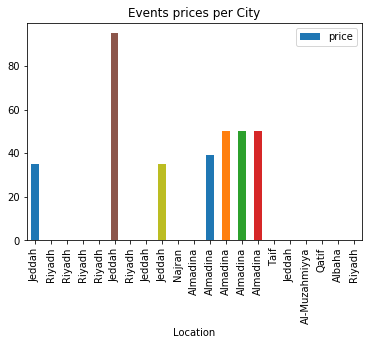

In [363]:
Roznama_DF.plot(y="price", x="Location", kind="bar", title='Events prices per City');


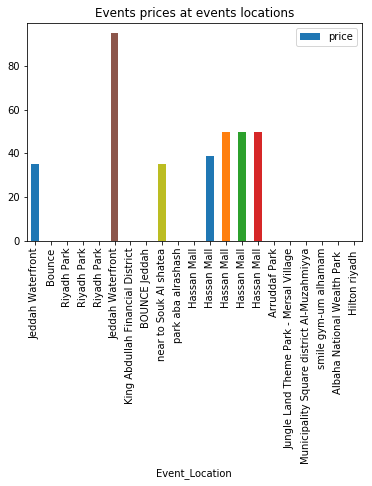

In [364]:
Roznama_DF.plot(y="price", x="Event_Location", kind="bar", title='Events prices at events locations' );


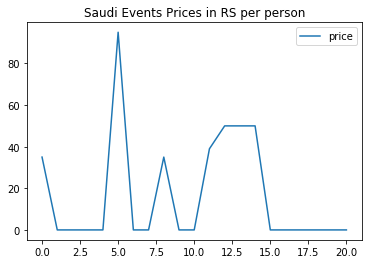

In [365]:
Roznama_DF.plot(kind='line', stacked=True, title='Saudi Events Prices in RS per person');

In [366]:
Roz = Roznama_DF['Location'].nunique()

In [367]:
Roz

8

In [368]:
m = Roznama_DF['price'].mean()

In [369]:
# the mean price in events is:
m

16.857142857142858

In [392]:
# Creating csv file from our dataframe:

Roznama_DF.to_csv('Roznama_KSA_Events.csv')

In [391]:
# the average price is 17 Riyals per person.
Roznama_DF.describe()

,price
count,21.000000
mean,16.857143
std,26.952339
min,0.000000
25%,0.000000
50%,0.000000
75%,35.000000
max,95.000000


## Dataset (featues) explained:


| Feature name | Description   | datatype|
|--------------|---------------|---------|
|   Event_Name | Name of Event | Object  |
|--------------|---------------|---------|
|   Event_Date | Event exact day| Object  |
|--------------|---------------|---------|
|   Location | Event City | Object  |
|--------------|---------------|---------|
|   Link | Event page URL | Object  |
|--------------|---------------|---------|
|   Event_type |  type of Event (show, festivel,..etc.)  | Object  |
|--------------|---------------|---------|
|   Event_Audiance | target audiance (family, kids,.. etc.) | Object  |
|--------------|---------------|---------|
|   Event_time | time in hours | Object  |
|--------------|---------------|---------|
|   Event_location | Event located inside City | Object  |
|--------------|---------------|---------|
|   Event_GPS_Location | GPS location of Event on map | Object  |
|--------------|--------------|--------------|
|   price | per person in Saudi Riyals | int  |

